In [6]:
import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import statsmodels.api as sm

import patsy

'''
Conveniently, statsmodels comes with built-in datasets, 
so we can load a time-series dataset straight into memory
dataset called "Atmospheric CO2 from Continuous Air Samples 
at Mauna Loa Observatory, Hawaii, U.S.A.,"
'''
data = sm.datasets.co2.load_pandas()
co2 = data.data

co2.head()
co2.dtypes
co2.index

y = co2['co2'].resample('MS').mean()
y.head(5)

y['1990':]
y['1995-10-01':'1996-10-01']

y.isnull().sum()
y = y.fillna(y.bfill())
y.isnull().sum()



0

In [7]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

co2.head()
co2.dtypes
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

In [8]:
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
1992-01-01    355.900
1992-02-01    356.680
1992-03-01    357.900
1992-04-01    359.075
1992-05-01    359.540
1992-06-01    359.125
               ...   
1999-07-01    369.000
1999-08-01    366.700
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
2000-02-01    369.375
2000-03-01    370.400
2000-04-01    371.540
2000-05-01    371.650
2000-06-01    371.625
2000-07-01    369.940
2000-08-01    367.950
2000-09-01

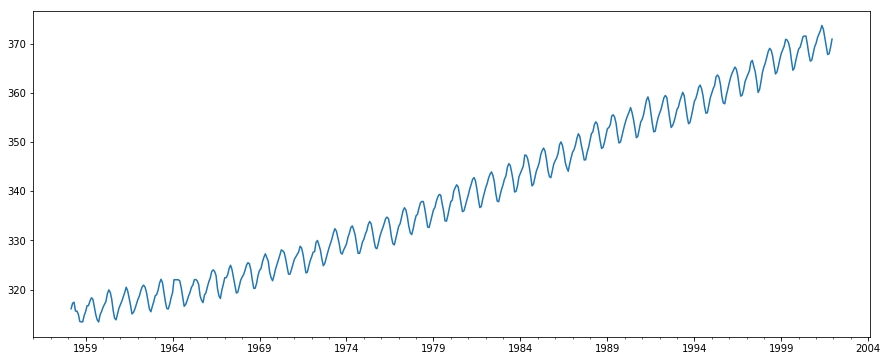

In [9]:
y.plot(figsize=(15, 6))
plt.show()


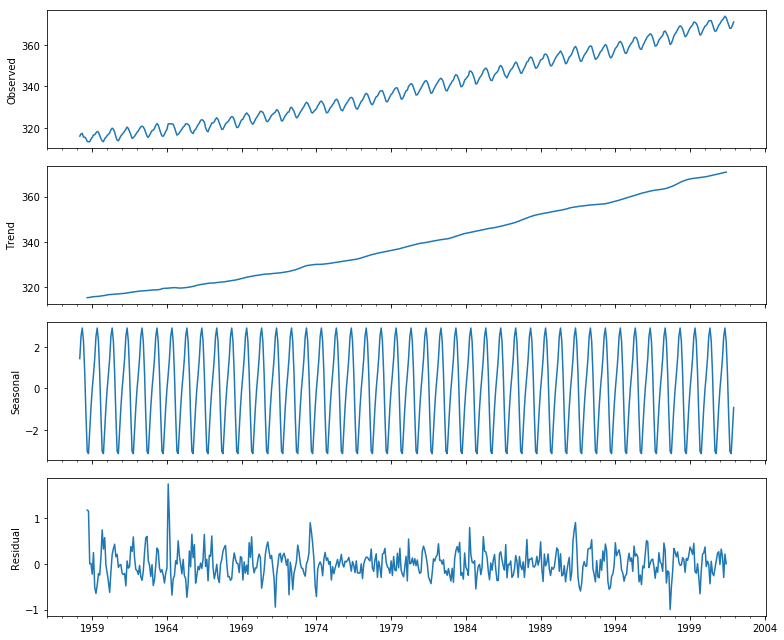

In [10]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()